In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
from numpy.linalg import eigvals
from scipy.integrate import solve_ivp

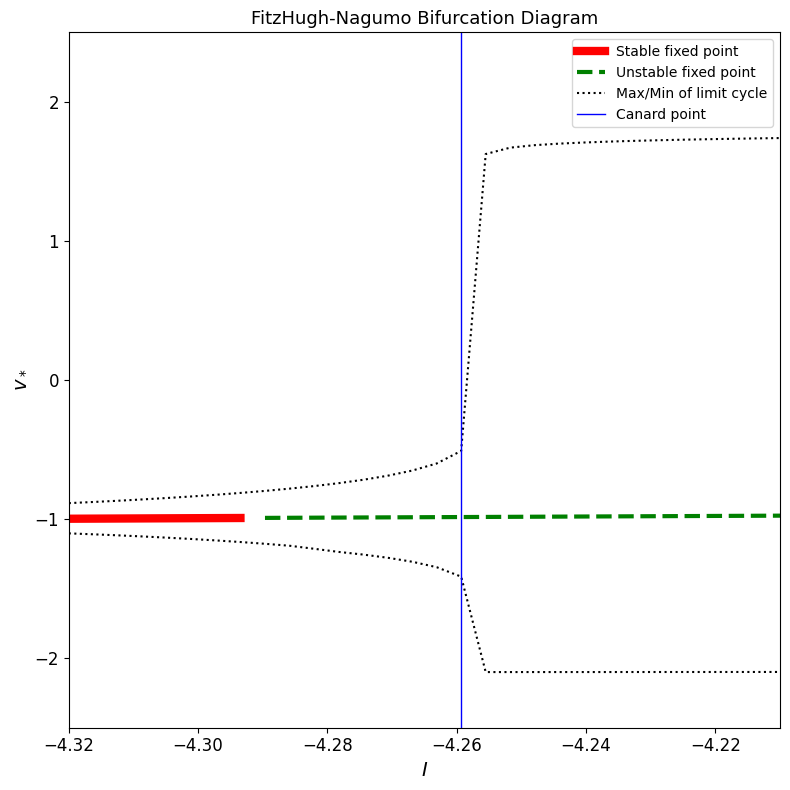

Canard point: -4.259310344827586


In [55]:
#BIFURCATION DIAGRAM PLOTTING
#Parameters
a = 5
tau_n = 60
# a = 1.25
# tau_n = 25
I_values = np.linspace(-4.32, -4.21, 30)
# I_values = np.linspace(-10, 10, 30)


def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v
def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]
def jacobian(v_star, n_star, a, tau_n):
    df1dv = 1 - v_star**2
    df1dn = -1
    df2dv = a / tau_n
    df2dn = -1 / tau_n
    return np.array([[df1dv, df1dn],
                     [df2dv, df2dn]])

stable_pts = []
unstable_pts = []
I_stable = []
I_unstable = []

v_max_list = []
v_min_list = []
I_cycle_list = []

canard_point = 0

t_span = (0, 200)
y0 = [-0.5, -3.0]

# i = 0
for I in I_values:
    sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I),
                    max_step=0.1, rtol=1e-6, atol=1e-8)

    t = sol.t
    v = sol.y[0]

    #use last 50% of data
    cutoff = int(0.5 * len(v))
    v_tail = v[cutoff:]

    v_max = np.max(v_tail)
    v_min = np.min(v_tail)

    v_max_list.append(v_max)
    v_min_list.append(v_min)
    I_cycle_list.append(I)
    # if canard_point == 0 and i >= 1 and abs(v_max_list[i] - v_min_list[i]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
    #     canard_point = I

    guesses = np.linspace(-3, 3, 10)
    v_roots = []

    for guess in guesses:
        v_star, = fsolve(fhn_nullcline, guess, args=(I, a))
        if not any(np.isclose(v_star, root, atol=1e-4) for root in v_roots):
            v_roots.append(v_star)

    for v_star in v_roots:
        n_star = a * v_star
        J = jacobian(v_star, n_star, a, tau_n)
        eigenvalues = eigvals(J)
        if np.all(np.real(eigenvalues) < 0):
            stable_pts.append(v_star)
            I_stable.append(I)
        else:
            unstable_pts.append(v_star)
            I_unstable.append(I)
    # i += 1
    
for i in range(len(v_max_list) - 2):
    if canard_point == 0 and abs(v_max_list[i+1] - v_min_list[i+1]) - abs(v_max_list[i-1] - v_min_list[i-1]) > 0.5:
        canard_point = I_cycle_list[i]

# Plotting
plt.figure(figsize=(8, 8))

plt.plot(I_stable, stable_pts, 'r-', linewidth=6, label='Stable fixed point')
plt.plot(I_unstable, unstable_pts, 'g--', linewidth=3, label='Unstable fixed point')

plt.plot(I_cycle_list, v_max_list, 'k:', linewidth=1.5, label='Max/Min of limit cycle')
plt.plot(I_cycle_list, v_min_list, 'k:', linewidth=1.5)

plt.axvline(x=canard_point, color='b', linewidth=1, label='Canard point')
plt.xlabel('$I$', fontsize=14)
plt.ylabel('$v_*$', fontsize=14)
plt.xlim([I_values[0], I_values[-1]])
plt.ylim([-2.5, 2.5])
# plt.ylim([-10, 10])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('FitzHugh-Nagumo Bifurcation Diagram', fontsize=13)
plt.grid(False)
plt.legend(loc='best', fontsize=10)
plt.tight_layout()
plt.show()
print('Canard point:', canard_point)


In [15]:
from tqdm import tqdm

Computing canard matrix:   0%|          | 0/21000 [00:00<?, ?it/s]

Computing canard matrix: 100%|██████████| 21000/21000 [40:59<00:00,  8.54it/s] 


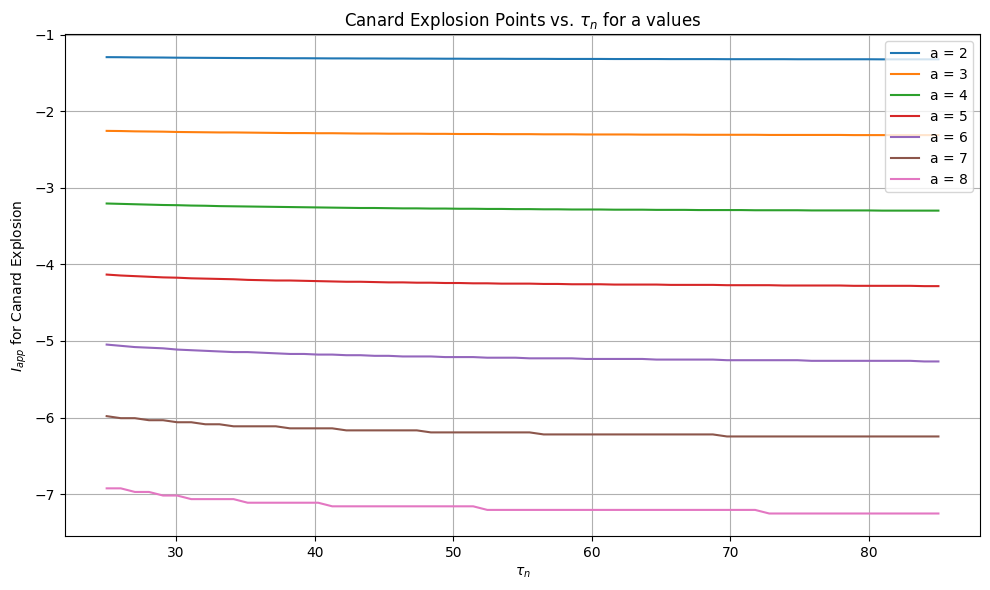

In [183]:
def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v

def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]

#parameters
a_vals = [2,3,4,5,6,7,8]#multiple a values
tau_n_vals = np.linspace(25, 85, 60)#use 2 to find range
# I_values = np.linspace(-4.5, -3.5, 10)
t_span = (0, 200)
y0 = [-0.5, -3.0]
canard_matrix = np.zeros((len(a_vals), len(tau_n_vals)))


#progress bar from GPT 4o
total_iterations = len(a_vals) * len(tau_n_vals) * len(I_values)
with tqdm(total=total_iterations, desc="Computing canard matrix") as pbar:
    for i, a in enumerate(a_vals):
        canard_curve = np.zeros(len(tau_n_vals))
        if a == 1:
            I_values = np.linspace(-0.7, -0.25, 50)
        elif a == 2:
            I_values = np.linspace(-1.33, -1.28, 50)
        elif a == 3:
            I_values = np.linspace(-2.35, -2.25, 50)
        elif a == 4:
            I_values = np.linspace(-3.3, -3.18, 50)
        elif a == 5:
            I_values = np.linspace(-4.3, -4.1, 50)
        elif a == 6:
            I_values = np.linspace(-5.3, -4.9, 50)
        elif a == 7:
            I_values = np.linspace(-6.3, -5.0, 50)
        elif a == 8:
            I_values = np.linspace(-7.3, -5.0, 50)
        elif a == 9:
            I_values = np.linspace(-8.3, -5.0, 50)
        elif a == 10:
            I_values = np.linspace(-9.3, -5.0, 50)#least optimal way to code this I know

        for j, tau_n in enumerate(tau_n_vals):
            v_max_list = []
            v_min_list = []
            I_cycle_list = []

            for I in I_values:
                sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I),
                                max_step=0.1, rtol=1e-6, atol=1e-8)

                v = sol.y[0]
                cutoff = int(0.5 * len(v))
                v_tail = v[cutoff:]
                v_max_list.append(np.max(v_tail))
                v_min_list.append(np.min(v_tail))
                I_cycle_list.append(I)

                pbar.update(1)

            #detect canard explosion
            for k in range(1, len(v_max_list) - 2):
                amp_now = abs(v_max_list[k+1] - v_min_list[k+1])
                amp_prev = abs(v_max_list[k - 1] - v_min_list[k - 1])
                if canard_curve[j] == 0 and (amp_now - amp_prev) > 0.5:
                    canard_curve[j] = I_cycle_list[k]
                    break#stop after 1st detection
            canard_matrix[i, j] = canard_curve[j]


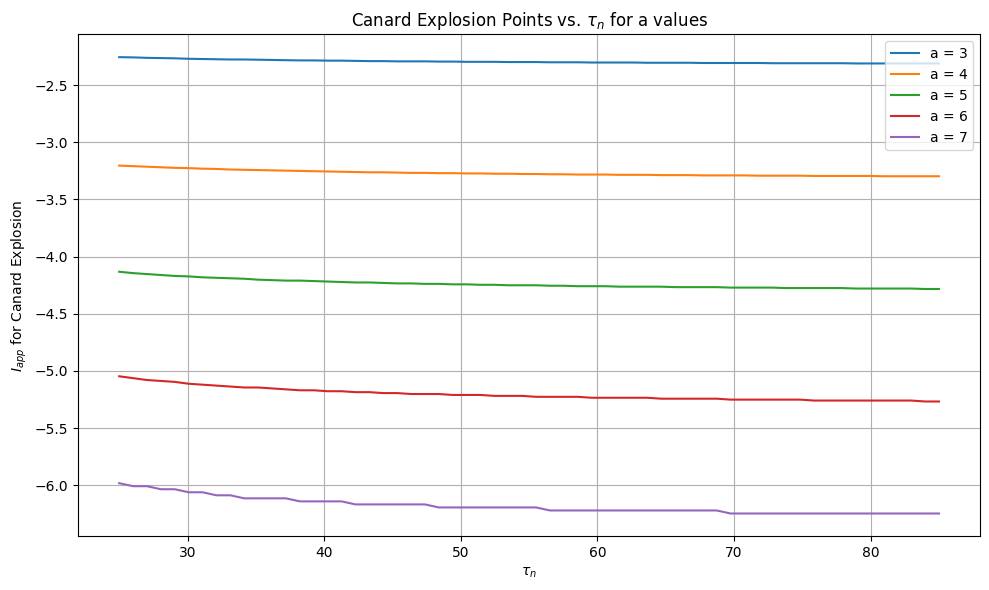

In [189]:
#PLOTTING
plt.figure(figsize=(10, 6))

for i in range(1,len(a_vals)-1):
    plt.plot(tau_n_vals, canard_matrix[i], label=f'a = {a_vals[i]}')

plt.title(r'Canard Explosion Points vs. $\tau_n$ for a values')
plt.xlabel(r'$\tau_n$')
plt.ylabel(r'$I_{app}$ for Canard Explosion')
plt.legend(loc = 'upper right')
plt.grid(True)
plt.tight_layout()
plt.show()

In [181]:
def fhn_nullcline(v, I, a):
    return v - (v**3) / 3 + I - a * v

def fh_n(t, y, a, tau_n, I):
    v, n = y
    dvdt = v - (v**3) / 3 - n + I
    dndt = (a * v - n) / tau_n
    return [dvdt, dndt]


##parameters
a_vals = [4]
# tau_n_vals = np.linspace(25, 85, 60)
tau_n_vals = np.linspace(25, 85, 60)
# I_values = np.linspace(-0.7, -0.25, 50)#good for a = 1
# I_values = np.linspace(-1.33, -1.28, 50)#good for a = 2
# I_values = np.linspace(-2.35, -2.25, 50)#good for a = 3
I_values = np.linspace(-3.3, -3.18, 50)#good for a = 4
# I_values = np.linspace(-4.3, -4.1, 50)#good for a = 5
# I_values = np.linspace(-5.3, -4.9, 50)#good for a = 6
# I_values = np.linspace(-6.3, -5.0, 50)#good for a = 7
# I_values = np.linspace(-7.3, -5.0, 50)#good for a = 8
# I_values = np.linspace(-8.3, -5.0, 50)#good for a = 9
# I_values = np.linspace(-9.3, -5.0, 50)#good for a = 10


canard_matrix = np.zeros((len(a_vals), len(tau_n_vals)))


t_span = (0, 200)
y0 = [-0.5, -3.0]

##progress bar coutesy of GPT 4o
total_iterations = len(a_vals) * len(tau_n_vals) * len(I_values)
with tqdm(total=total_iterations, desc="Computing canard matrix") as pbar:
    for i, a in enumerate(a_vals):
        for j, tau_n in enumerate(tau_n_vals):
            v_max_list = []
            v_min_list = []
            I_cycle_list = []

            for I in I_values:
                sol = solve_ivp(fh_n, t_span, y0, args=(a, tau_n, I), max_step=0.1, rtol=1e-6, atol=1e-8)

                v = sol.y[0]
                cutoff = int(0.5 * len(v))
                v_tail = v[cutoff:]
                v_max_list.append(np.max(v_tail))
                v_min_list.append(np.min(v_tail))
                I_cycle_list.append(I)

                pbar.update(1)

            #detect canard explosion
            for k in range(1, len(v_max_list) - 2):
                amp_now = abs(v_max_list[k+1] - v_min_list[k+1])
                amp_prev = abs(v_max_list[k - 1] - v_min_list[k - 1])
                if canard_matrix[i][j] == 0 and (amp_now - amp_prev) > 0.5:
                    canard_matrix[i][j] = I_cycle_list[k]
                    break#stop after 1st detection


Computing canard matrix: 100%|██████████| 3000/3000 [05:10<00:00,  9.65it/s]


[-3.2044898  -3.20938776 -3.21428571 -3.21918367 -3.22408163 -3.22653061
 -3.23142857 -3.23387755 -3.23877551 -3.24122449 -3.24367347 -3.24612245
 -3.24857143 -3.25102041 -3.25346939 -3.25591837 -3.25836735 -3.26081633
 -3.26326531 -3.26326531 -3.26571429 -3.26816327 -3.26816327 -3.27061224
 -3.27061224 -3.27306122 -3.27306122 -3.2755102  -3.2755102  -3.27795918
 -3.27795918 -3.28040816 -3.28040816 -3.28285714 -3.28285714 -3.28285714
 -3.28530612 -3.28530612 -3.28530612 -3.2877551  -3.2877551  -3.2877551
 -3.29020408 -3.29020408 -3.29020408 -3.29020408 -3.29265306 -3.29265306
 -3.29265306 -3.29265306 -3.29510204 -3.29510204 -3.29510204 -3.29510204
 -3.29510204 -3.29755102 -3.29755102 -3.29755102 -3.29755102 -3.29755102]


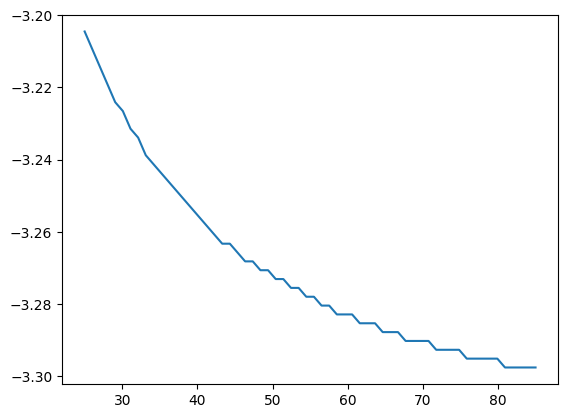

In [182]:
print(canard_matrix[:][0])
plt.plot(tau_n_vals, canard_matrix[:][0], label='a = 1')

In [190]:
#abandoned
# fig, ax = plt.subplots(figsize=(8, 6))
# c = ax.imshow(canard_matrix, aspect='auto', origin='lower',
#               extent=[tau_n_vals[0], tau_n_vals[-1], a_vals[0], a_vals[-1]],
#               cmap='viridis')

# # Axis labels and ticks
# ax.set_xlabel(r'$\tau_n$', fontsize=14)
# ax.set_ylabel(r'$a$', fontsize=14)
# ax.set_title('Canard Explosion Threshold $I_{app}$', fontsize=16)

# # Colorbar
# cb = plt.colorbar(c, ax=ax)
# cb.set_label(r'$I_{app}$ for Canard Explosion', fontsize=12)

# plt.tight_layout()
# plt.show()